In [1]:
import pandas as pd
from matplotlib import pyplot as plt

from bigdatavqa.coreset import Coreset
from bigdatavqa.datautils import DataUtils
from bigdatavqa.divisiveclustering import (
    DivisiveClusteringKMeans,
    DivisiveClusteringMaxCut,
    DivisiveClusteringRandom,
    DivisiveClusteringVQE,
    get_divisive_sequence,
)

from bigdatavqa.divisiveclustering import Dendrogram

In [2]:
number_of_qubits = 10
circuit_depth = 1
max_shots = 1000
max_iterations = 100
data_location = "../data"
number_of_coresets_to_evaluate = 15
number_of_sampling_for_centroids = 20
threshold_for_max_cut = 0.2

### Load data

In [3]:
data_utils = DataUtils(data_location)
raw_data = data_utils.load_dataset()

Data loaded from ../data/dataset.pickle


### Get coresets

In [4]:
coreset = Coreset(raw_data, number_of_sampling_for_centroids, number_of_qubits, number_of_coresets_to_evaluate)
coreset_vectors, coreset_weights = coreset.get_best_coresets()

Using BFL16 method to generate coresets


/home/yogi/.pyenv/versions/3.10.0/envs/VQA/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/yogi/.pyenv/versions/3.10.0/envs/VQA/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/yogi/.pyenv/versions/3.10.0/envs/VQA/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/yogi/.pyenv/versions/3.10.0/envs/VQA/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `

In [6]:
coreset_df = pd.DataFrame(coreset_vectors, columns=list("XY"))
coreset_df['weights'] = coreset_weights
coreset_df["Name"] = [chr(i + 65) for i in coreset_df.index]
coreset_df

,X,Y,weights,Name
0,-2.002710,1.040100,61.976558,A
1,8.020843,0.773881,103.841904,B
2,1.635602,-0.766509,53.934397,C
3,-2.103251,2.782011,20.601490,D
4,8.255170,1.048232,93.026067,E
5,4.997290,2.040100,93.650657,F
6,-0.879693,-0.080277,35.304704,G
7,-1.425829,2.293500,44.503448,H
8,-0.076350,0.488051,189.074916,I
9,2.174371,-2.913593,49.226833,J


Text(0.5, 1.0, 'Visualizing raw data and the corresponding coreset')

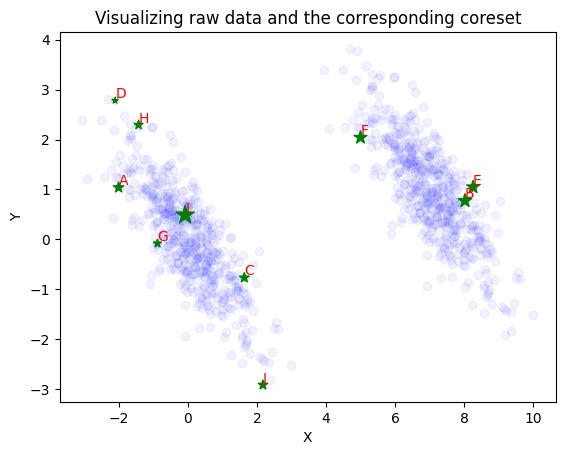

In [7]:
plt.scatter(raw_data[:, 0], raw_data[:, 1], color = 'blue', alpha=0.05)
plt.scatter(coreset_df.X, coreset_df.Y, s = coreset_df.weights, marker='*', color = 'green')
for idx, row in coreset_df.iterrows():
    plt.annotate(row["Name"], xy = (row.X, row.Y+ 0.05), color = "red")

plt.xlabel("X")
plt.ylabel("Y")

plt.title("Visualizing raw data and the corresponding coreset")

In [8]:
divisive_clustering_function = DivisiveClusteringVQE(
    circuit_depth=circuit_depth,
    max_iterations=max_iterations,
    max_shots=max_shots,
    threshold_for_max_cut=threshold_for_max_cut,
)

hierrachial_sequence_using_VQE = get_divisive_sequence(coreset_df, divisive_clustering_function)

divisive_clustering_function = DivisiveClusteringMaxCut()

hierrachial_sequence_using_MaxCut = get_divisive_sequence(coreset_df, divisive_clustering_function)

divisive_clustering_function = DivisiveClusteringRandom()

hierrachial_sequence_using_random = get_divisive_sequence(coreset_df, divisive_clustering_function)

divisive_clustering_function = DivisiveClusteringKMeans()

hierrachial_sequence_using_KMeans = get_divisive_sequence(coreset_df, divisive_clustering_function)

100%|██████████| 25/25 [00:00<00:00, 27991.88it/s]
/home/yogi/Projects/experiments/bigdata_vqa/src/bigdatavqa/divisiveclustering/divisiveclustering.py:94: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iteration_dataframe["cluster"] = [int(bit) for bit in bitstring]
100%|██████████| 3/3 [00:00<00:00, 48395.82it/s]
/home/yogi/Projects/experiments/bigdata_vqa/src/bigdatavqa/divisiveclustering/divisiveclustering.py:94: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iteration_dataframe["cluster"] = [int(bit) for 

/home/yogi/Projects/experiments/bigdata_vqa/src/bigdatavqa/divisiveclustering/dendrogram.py:47: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  converted_hc.append([coreset_data.Name[num] for num in hc])


ValueError: Linkage 'Z' contains negative distances.

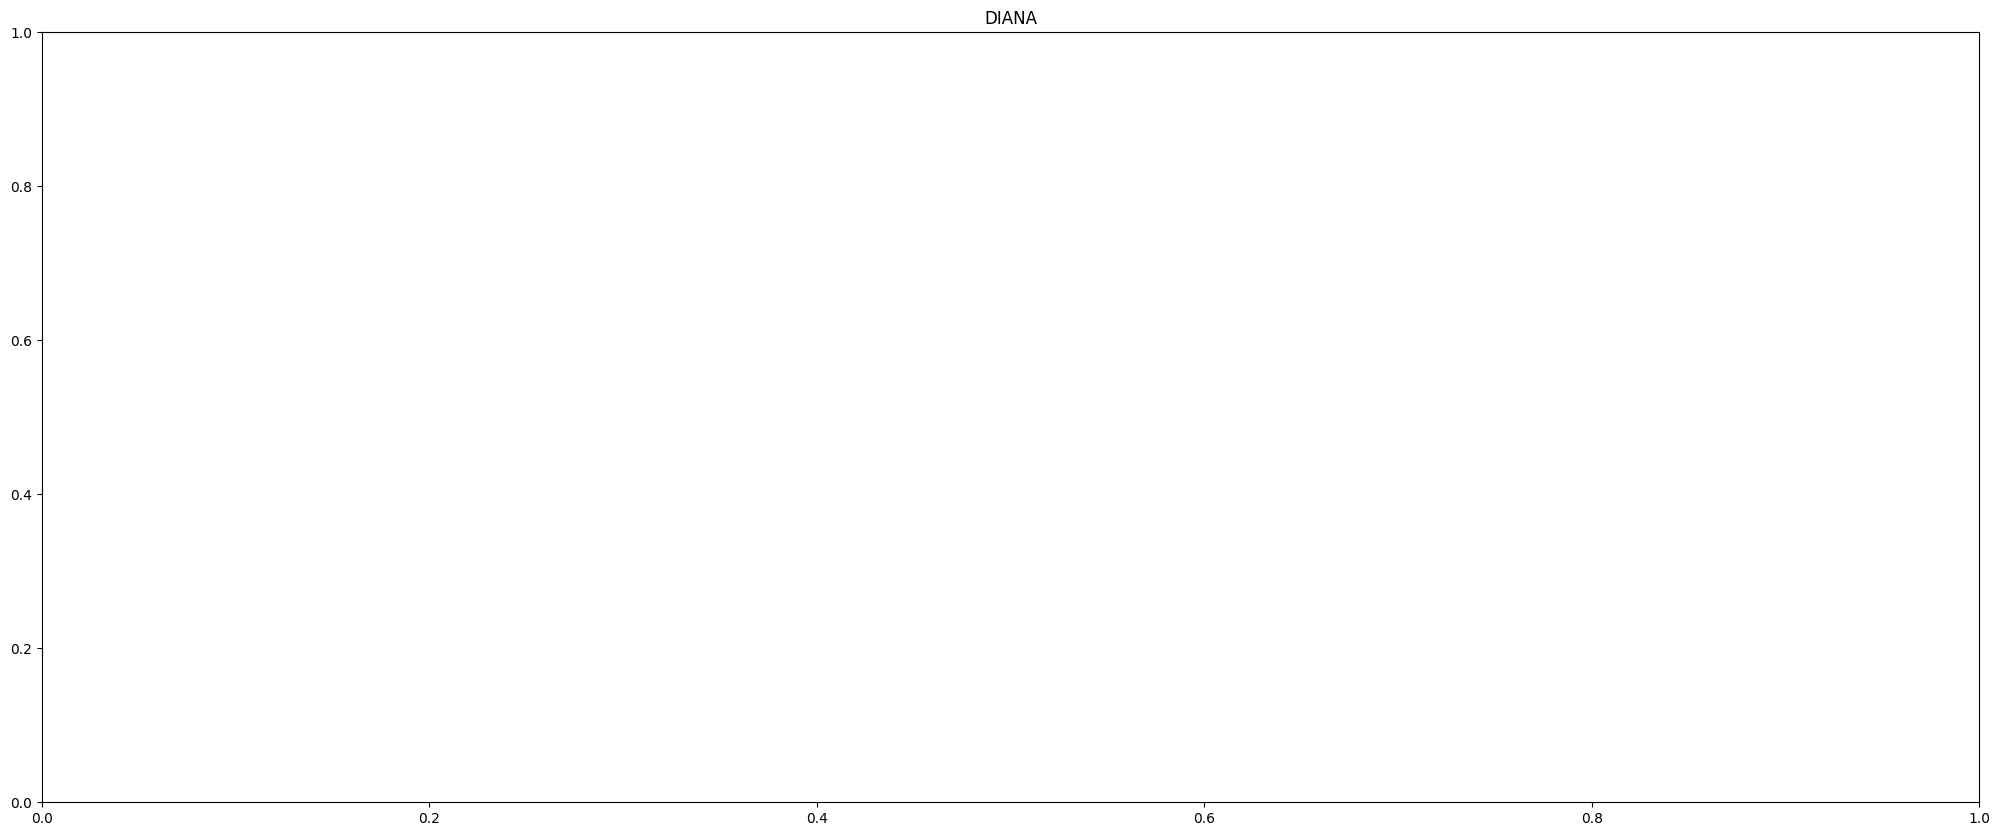

In [14]:

dendo = Dendrogram(coreset_df, hierrachial_sequence_using_VQE)
dendo.plot_dendrogram()

dendo = Dendrogram(coreset_df, hierrachial_sequence_using_MaxCut)
dendo.plot_dendrogram()

dendo = Dendrogram(coreset_df, hierrachial_sequence_using_random)
dendo.plot_dendrogram()

dendo = Dendrogram(coreset_df, hierrachial_sequence_using_KMeans)
dendo.plot_dendrogram()

### Calculating the total cost

In [ ]:
centroid_coords = dendo.get_centroid_coords()

cost_list = get_divisive_cluster_cost(dendo, hc, centroid_coords)

vqe_cost = sum(cost_list)

print(f"VQE cost: {vqe_cost}")

### Hierarchial division through other methods
Available methods are "kmeans", "maxcut" and "random"

## Visualizing the cost output

In [ ]:
# Define the cost values
cost_values = [random_cost, vqe_cost, kmeans_cost, max_cut_cost]

# Define the labels for the x-axis
labels = ['Random Cluster','VQE', 'K-means', 'Brute Force']

# Create the bar chart
plt.bar(labels, cost_values)

# Add labels and title
plt.xlabel('Method')
plt.ylabel('Cost Value')
plt.title('Cost Values Comparison (Lower is better)')

# Display the chart
plt.show()